# Reinforcement learning

In [1]:
#import keras
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from tqdm import tqdm
import seaborn as sns
%matplotlib inline

## Let us define a simple game

100%|██████████| 1000/1000 [00:10<00:00, 98.64it/s]


[[ 3.5 -10.  -10.  -10.   3.1]
 [-10.  -10.  -10.   3.5  3.1]
 [ 3.9  3.1  3.1  3.5  3.5]
 [ 3.9 -10.   3.5 -10.   3.5]
 [-10.   3.5 -10.   4.3  3.9]
 [ 4.8 -10.   3.9  3.9  4.3]
 [-9.   3.5  4.3 -10.   3.9]
 [-10.   4.3 -10.  -10.   5.3]
 [-10.  -10.  -10.  -10.  -10. ]]
[[ -6.7e-03  -1.0e+01  -1.0e+01  -1.0e+01  -5.5e-03]
 [ -1.0e+01  -1.0e+01  -1.0e+01  -9.7e-03  -4.5e-03]
 [ -7.2e-03  -7.8e-03  -8.1e-01  -8.1e+00  -9.1e-03]
 [ -7.5e-03  -1.0e+01  -1.3e-02  -1.0e+01  -7.2e-03]
 [ -1.0e+01  -1.5e-02  -1.0e+01  -8.9e-01  -7.3e-03]
 [ -8.1e-05  -1.0e+01  -8.8e-02  -8.1e+00  -1.5e-04]
 [ -9.0e+00  -7.4e-02  -6.8e-02  -1.0e+01  -2.4e-03]
 [ -1.0e+01  -8.2e-02  -1.0e+01  -1.0e+01   0.0e+00]
 [ -1.0e+01  -1.0e+01  -1.0e+01  -1.0e+01  -1.0e+01]]


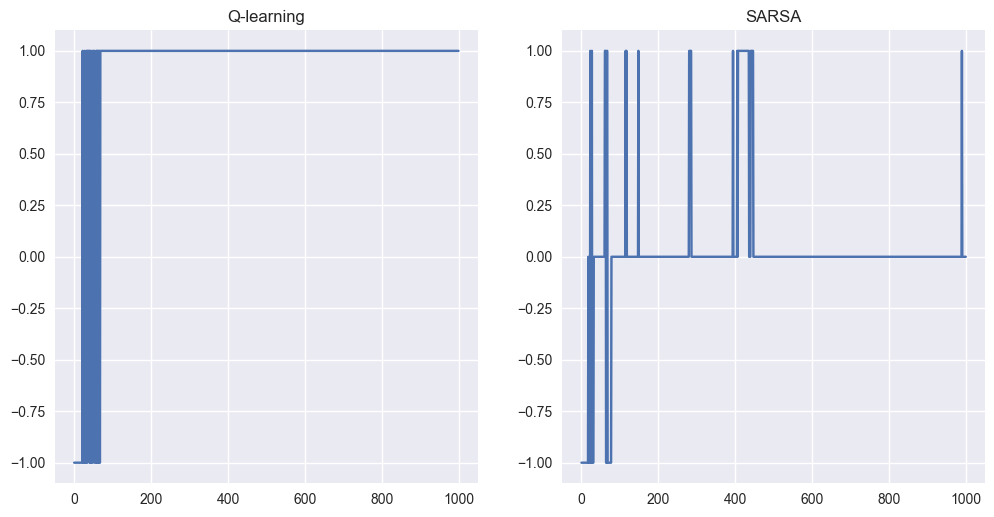

In [248]:
# http://outlace.com/Reinforcement-Learning-Part-1/
#There is a series of connected paths that lead to a Goal (G). Player begins in
#State cero (S). Four actions are available: up, down, left, right, and stay.
#There are two paths to the goal
np.set_printoptions(precision=1)
N=-1
W=1
#      G
#     |
#   0-0-0
#   |  |
# 0-0-0
#  |
#  S
R=np.array([
            [0,N,N,N,0],
            [N,N,N,0,0],
            [0,0,0,0,0],
            [0,N,0,N,0],
            [N,0,N,0,0],
            [0,N,0,0,0],
            [0,0,0,N,0],
            [N,0,N,N,W],
            [N,N,N,N,N]],dtype=np.float32)


T=np.array([
            [2,8,8,8,0],
            [8,8,8,2,1],
            [4,0,1,3,2],
            [6,8,2,8,3],
            [8,2,8,5,4],
            [7,8,4,6,5],
            [8,2,5,8,6],
            [8,5,8,8,7],
            [8,8,8,8,8]])
# T=np.array([[2,5,5,5,0],
#           [5,5,5,2,1],
#           [4,0,1,3,2],
#           [5,5,2,4,3],
#           [5,2,5,5,4],
#           [5,5,5,5,5]])
# R=np.array([[0,N,N,N,0],
#           [N,N,N,0,0],
#           [0,0,0,0,0],
#           [N,N,0,0,0],
#           [N,0,0,0,W],
#           [N,N,N,N,N]])
win_state=7
death_state=8

# win_state=4
# death_state=5
Q=np.zeros_like(R,dtype=np.float32)
G=False
def get_next_state(state,action):
    return T[state,action]
def softmax(a,T=1):
    return np.exp((a-np.max(a))/T)/np.exp((a-np.max(a))/T).sum()
def temperature(i,greedy=G):
    if(greedy==0):
        return 100*np.exp(-0.5*i)+1e-2
    else:
        return -0.9*np.exp(-0.1*i)+1
def act(Qmat,state,i,greedy=G):
    if greedy==0:
        return np.random.choice(5,p=softmax(Qmat[state,:],temperature(i)))
    else:
        return np.random.choice([np.argmax(Qmat[state,:]),np.random.randint(5)],p=[temperature(i),1-temperature(i)])
def update_Q(Qmat,state,action,next_state,i,qlearn=True):
    on=np.max(Qmat[next_state,:]) if qlearn else Qmat[next_state,act(Qmat,state,i)]
    Qmat[state,action]+=alpha*(R[state,action]+gamma*on-Qmat[state,action])
    return Qmat
def play(Qmat,n=1):
    reward=0.
    for l in range(n):
        state=0
        for k in range(its): 
            ac=act(Qmat,state,100)
            reward+=R[state,ac]
            state=get_next_state(state,ac)
            if((state==win_state and ac==4)  or (state==death_state)):break
    return reward/n
gamma=0.9
alpha=0.9
episode_n=1000
its=200
Q_2=np.zeros_like(Q)

plays2=[]
def iterate(Qmat,qlearn=True):
    plays=[]
    for i in tqdm(range(episode_n)):
        state=0
        state=np.random.randint(5)
        for j in range(its):
            action=act(Qmat,state,temperature(i))
            next_state=get_next_state(state,action)        
            Qmat=update_Q(Qmat,state,action,next_state,i,qlearn=qlearn)
            if((state==win_state and action==4)  or (state==death_state)):break
            state=next_state        
        plays.append(play(Qmat))
    return Qmat,plays
Q,plays=iterate(Q,qlearn=True)
Q_2,plays2=iterate(Q_2,qlearn=False)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(plays)
plt.title('Q-learning')
plt.subplot(122)
plt.plot(plays2)
plt.title('SARSA')
print(Q)   
print(Q_2)



SARSA is more conservative, and it will work better if the policy followed is the actual policy being used during learning. Q-learning will learn the optimal policy, so an argmax play will be optimal with it.

In [198]:
temperature(100,greedy=1)

0.99995914006321374

In [180]:
print(Q)
print(R)

[[ 0. -1. -1. -1.  0.]
 [-1. -1. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [-1. -1.  0.  0.  0.]
 [ 8.  9.  9.  9. 10.]
 [-10. -10. -10. -10. -10.]]
[[ 0 -1 -1 -1  0]
 [-1 -1 -1  0  0]
 [ 0  0  0  0  0]
 [-1 -1  0  0  0]
 [-1  0  0  0  1]
 [-1 -1 -1 -1 -1]]


## Let's play tic-tac-toe

Now, we have more states. I will define a state by the numbers 0 (empty), 1(the machine's move), 2 (my move). Each turn, the machine will get a 9-vector and act. Reward if three in row.

In [ ]:
def three_in_row(state):
    